In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2020-07-03 03:24:28--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  1.06MB/s    in 0.2s    

2020-07-03 03:24:28 (1.06 MB/s) - ‘SPY.csv’ saved [251935/251935]

--2020-07-03 03:24:29--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  15.4MB/s    in 1.6s    

2020-07-03 03:24:31 (15.4 MB/s) - ‘sp500su

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
spy['SPY'] = spy['Close'].pct_change(1)

In [ ]:
index = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)

In [ ]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [ ]:
aapl['AAPL'] = aapl['Close'].pct_change(1)

In [ ]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [ ]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


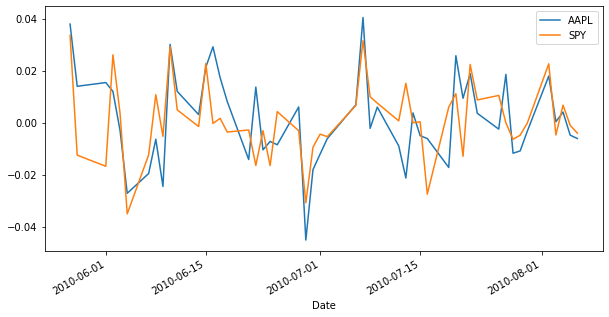

In [ ]:
joined.iloc[100:150].plot(figsize=(10, 5));

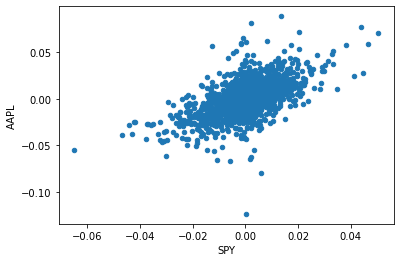

In [ ]:
joined.plot.scatter('SPY', 'AAPL')

In [ ]:
# make the dataset
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [ ]:
X.shape, Y.shape

((2262, 1), (2262, 1))

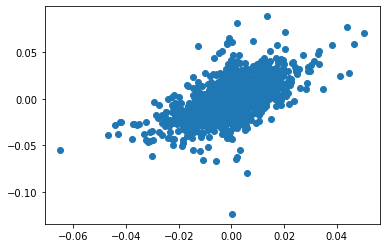

In [ ]:
plt.scatter(X, Y);

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

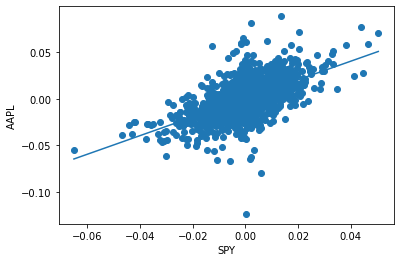

In [ ]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [ ]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

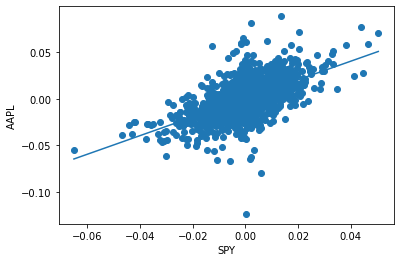

In [ ]:
# Manual calculation
Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [ ]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [ ]:
joined['AAPL'].std() / joined['SPY'].std()

1.7179632360403774